In [5]:
from keras.datasets import mnist
(train_images, train_labels), (test_images,test_labels) = mnist.load_data()

In [6]:
train_images.shape #(60000,28,28)
len(train_labels) # 60000
test_images.shape #(10000, 28, 28)
len(test_labels) #10000

10000

In [7]:
from keras import models
from keras import layers

network = models.Sequential()
network.add(layers.Dense(512,activation='relu',input_shape=(28*28,)))
network.add(layers.Dense(10,activation = 'softmax'))  #https://dsbook.tistory.com/59

In [8]:
network.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [9]:
train_images = train_images.reshape((60000, 28*28)) #원래 (60000 , 28 , 28)
train_images = train_images.astype('float32') / 255 #이미지 전처리 과정 보통 이미지 픽셀의 최댓값인 255로 나눔

test_images = test_images.reshape((10000, 28*28))
test_images = test_images.astype('float32') / 255



In [10]:
from keras.utils import to_categorical  #https://thebook.io/006975/part01/ch03/05/02-01/
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

In [11]:
network.fit(train_images,train_labels,epochs=5,batch_size=128)

Epoch 1/5
469/469 [==============================] - 4s 9ms/step - loss: 0.2577 - accuracy: 0.9255
Epoch 2/5
469/469 [==============================] - 4s 9ms/step - loss: 0.1040 - accuracy: 0.9692
Epoch 3/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0695 - accuracy: 0.9787
Epoch 4/5
469/469 [==============================] - 4s 8ms/step - loss: 0.0501 - accuracy: 0.9856
Epoch 5/5
469/469 [==============================] - 4s 9ms/step - loss: 0.0382 - accuracy: 0.9882


In [12]:
test_loss, test_acc = network.evaluate(test_images, test_labels)
print('test_acc:',test_acc)

313/313 [==============================] - 1s 2ms/step - loss: 0.0698 - accuracy: 0.9794
test_acc: 0.9793999791145325


In [13]:
import numpy as np
x = np.array(12) #스칼라 텐서의 축 개수 = 랭크 = 0

In [14]:
x = np.array([12,3,6,14,7]) ## 5D 벡터 , 1D 텐서
x.ndim

1

In [27]:
x = np.array([[5,78,2,34,0],
              [6,79,3,35,1],
              [7,80,4,36,2]]) # 1행 5,78~ 1열 5,6,7
x.ndim

IndexError: ignored

In [16]:
x = np.array([[[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]],
               [[5,78,2,34,0],
                [6,79,3,35,1],
                [7,80,4,36,2]],
              [[5,78,2,34,0],
               [6,79,3,35,1],
               [7,80,4,36,2]]])

In [17]:
from keras.datasets import mnist
(train_images,train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.ndim) #3
print(train_images.shape) #(60000,28,28)
print(train_images.dtype) # uint8

3
(60000, 28, 28)
uint8


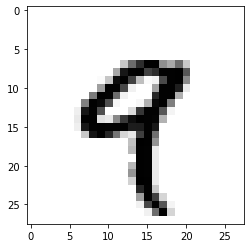

In [18]:
digit = train_images[4]

import matplotlib.pyplot as plt
plt.imshow(digit,cmap=plt.cm.binary) # 컬러맵 다양한 컬러 가능
plt.show()

In [19]:
my_slice = train_images[10:100]
print(my_slice.shape) # (90,28,28)
my_slice = train_images[10:100,0:28,0:28]
my_slice.shape

my_slice = train_images[:,14:,14:]
my_slice = train_images[:,7:-7,7:-7]
my_slice.shape

(90, 28, 28)


(60000, 14, 14)

In [23]:
def naive_relu(x):
  assert len(x.shape) # https://wikidocs.net/21050

  x = x.copy()
  for i in range(x.shape[0]):
    x[i,j] = max(x[i,j],0)
  return x

In [24]:
def naive_add(x, y):
  assert len(x.shape) == 2
  assert x.shape == y.shape

  x = x.copy()
  for i in range(x.shaep[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[i,j]
  return x

In [ ]:
def naive_add_matrix_and_vector(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  x = x.copy()
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      x[i, j] += y[j]
  return x

In [28]:
def native_vector_dot(x,y):
  assert len(x.shape) == 1
  assert len(y.shape) == 1
  assert x.shape[0] == y.shape[0]

  z = 0.
  for i in range(x.shape[0]):
    z += x[i] * y[i]
  return z

In [30]:
import numpy as np
def naive_matrix_vector_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 1
  assert x.shape[1] == y.shape[0]

  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    for j in range(x.shape[1]):
      z[i] += x[i,j] * y[j]
  return zip

def naive_matrix_vector_dot(x,y):
  z = np.zeros(x.shape[0])
  for i in range(x.shape[0]):
    z[i] = naive_vector_dot(x[i,:],y)
  return z

def naive_matrix_dot(x,y):
  assert len(x.shape) == 2
  assert len(y.shape) == 2
  assert x.shape[1] == y.shape[0]

  z = np.zeros((x.shape[0],y.shape[1]))
  for i in range(x.shape[0]):
    for j in range(y.shape[1]):
      row_x = x[i,:]
      column_y = y[:,j]
      z[i,j] = naive_vector_dot(row_x,column_y)
  return z

In [34]:
x = np.array([[0., 1.],
              [2., 3.],
              [4.,5.]])
print(x.shape)
x = x.reshape((6,1))
print(x)
x = x.reshape((2,3))
print(x)

x = np.zeros((300,20))
x = np.transpose(x)
print(x.shape)

(3, 2)
[[0.]
 [1.]
 [2.]
 [3.]
 [4.]
 [5.]]
[[0. 1. 2.]
 [3. 4. 5.]]
(20, 300)
